# ß of an asset 
##### how to estimate the beta of an asset using the linear regression model


In [127]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [128]:
# get data from yahoo finance
data = yf.download("GOOG ^NDX", start="2012-01-01", interval="1d")["Adj Close"]
df = pd.concat([data], axis=1)
df.columns = ["GOOG", "^NDX"]
data = round(df, 2)

[*********************100%***********************]  2 of 2 completed


- GOOG = Google 
- ^NDX = Nasdaq

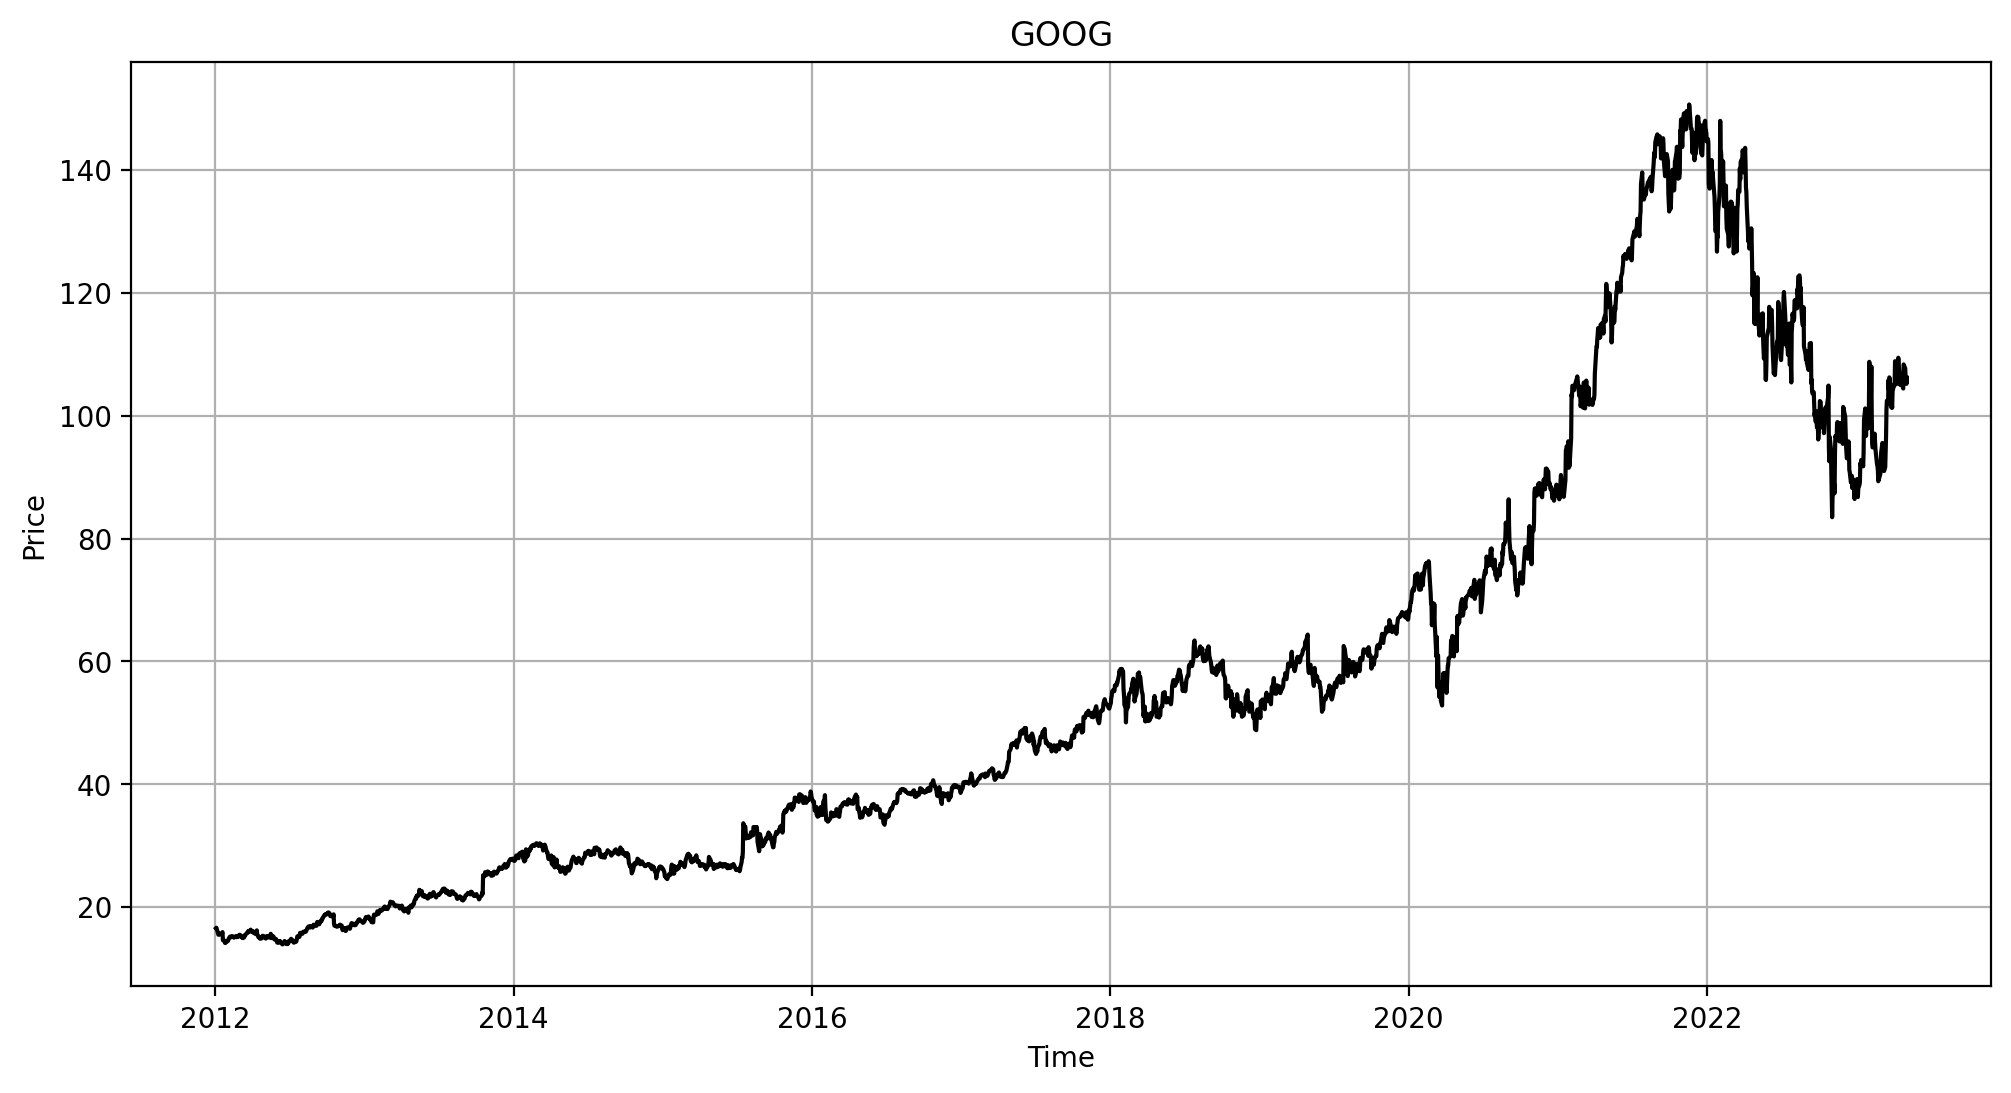

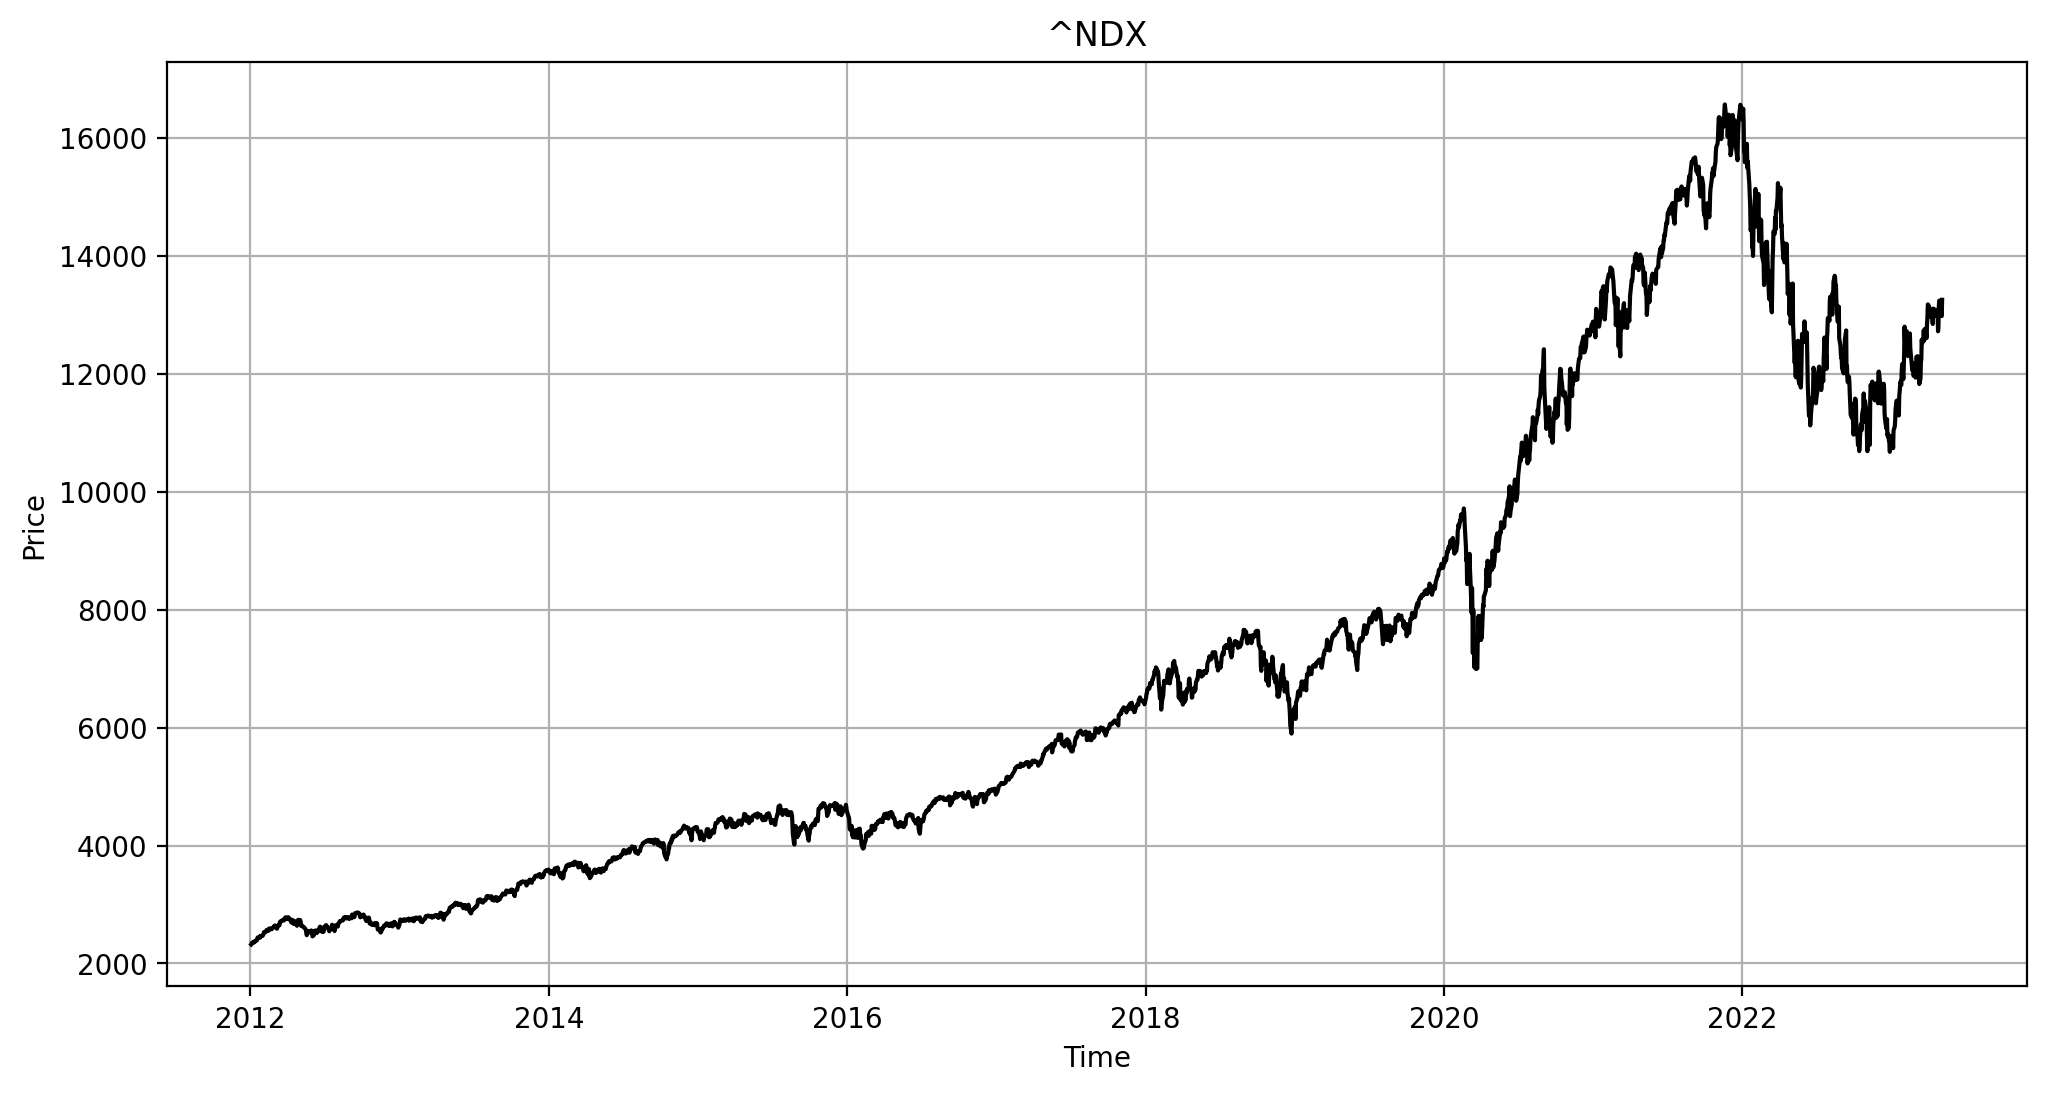

In [129]:
for single_data in data:
    plt.figure(figsize=(12,6), dpi=200)
    plt.plot(data[single_data], color="black")
    plt.title(single_data)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()


In [130]:
data.head(5)

,GOOG,^NDX
Date,,
2012-01-03,16.57,2321.96
2012-01-04,16.64,2329.71
2012-01-05,16.41,2348.98
2012-01-06,16.19,2356.17
2012-01-09,15.50,2350.65


In [131]:
data.tail(5)

,GOOG,^NDX
Date,,
2023-05-01,107.71,13231.47
2023-05-02,105.98,13113.66
2023-05-03,106.12,13030.21
2023-05-04,105.21,12982.48
2023-05-05,106.21,13259.13


##### Implementation
- calculating the return of the assets (.pct_change)
- calculating the coefficients (.polyfit)

In [132]:
x = data["^NDX"].pct_change()
y = data["GOOG"].pct_change()
x.dropna(inplace=True)
y.dropna(inplace=True)
coeff = b, a = np.polyfit(x, y, 1)

In [133]:
#print b(=ß)
b

1.0195744236461954

In [134]:
# Rsquared  reg dev / total dev
p = np.poly1d(coeff)
yi = p(x)
ym = np.sum(y)/len(y)
devreg = np.sum((yi-ym)**2)
devtot = np.sum((y - ym)**2)
Rsquared = devreg / devtot

In [135]:
Rsquared

0.6178261606382605

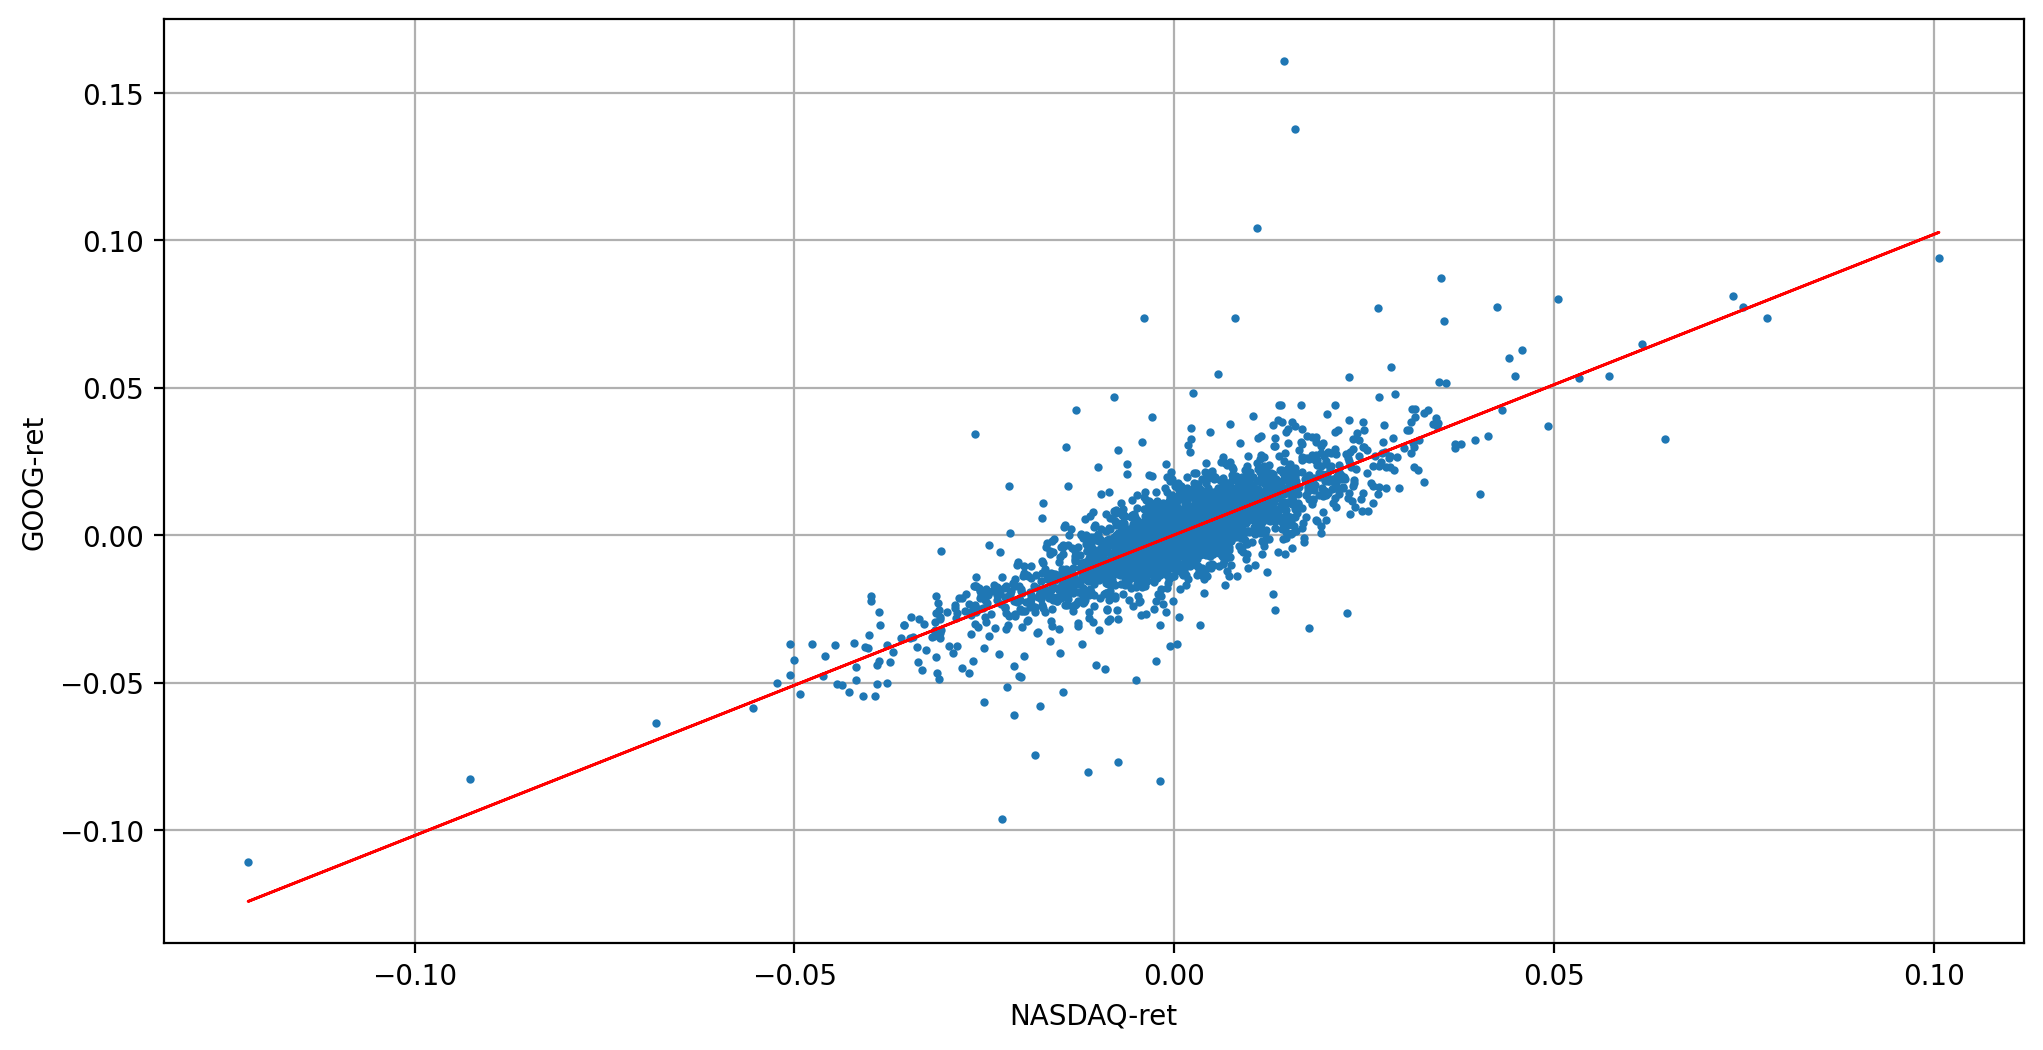

In [136]:
# plot
fig, ax = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax.plot(x, y, ".", markersize=4)
ax.plot(x, b*x+a, color='red', linewidth=1)
ax.set_xlabel("NASDAQ-ret")
ax.set_ylabel("GOOG-ret")
plt.grid(True)
plt.show()


[back to other projects](Projects/index.html)